# Data Visualization

In [1]:
import pandas as pd
import numpy as np
import os



import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime

import statsmodels.tsa.api as smt

In [2]:
df=pd.read_csv('../ML_model/simulateddata.csv', parse_dates = [0])

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        90 non-null     datetime64[ns]
 1   Vegetables  90 non-null     float64       
 2   Meat        90 non-null     float64       
 3   Fruits      90 non-null     float64       
 4   Seafood     90 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.6 KB


,Date,Vegetables,Meat,Fruits,Seafood
0,2021-07-01,0.113667,0.303852,0.058907,0.086951
1,2021-07-02,0.107876,0.283707,0.060557,0.089430
2,2021-07-03,0.115584,0.280579,0.064354,0.091853
3,2021-07-04,0.108115,0.287054,0.056692,0.089965
4,2021-07-05,0.104577,0.290579,0.061578,0.092422


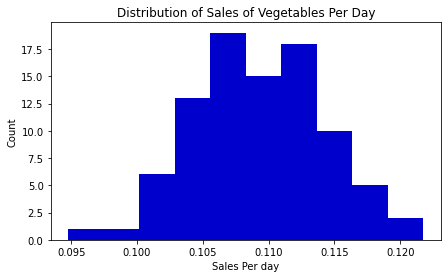

In [4]:
def sales_data_veg():
    fig, ax = plt.subplots(figsize=(7,4))
    plt.hist(df.Vegetables, color='mediumblue')
    
    ax.set(xlabel = "Sales Per day",
           ylabel = "Count",
           title = "Distribution of Sales of Vegetables Per Day")
    
sales_data_veg()

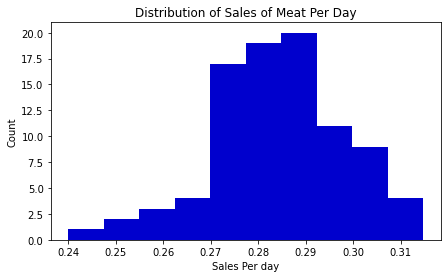

In [5]:
def sales_data_meat():
    fig, ax = plt.subplots(figsize=(7,4))
    plt.hist(df.Meat, color='mediumblue')
    
    ax.set(xlabel = "Sales Per day",
           ylabel = "Count",
           title = "Distribution of Sales of Meat Per Day")
    
sales_data_meat()

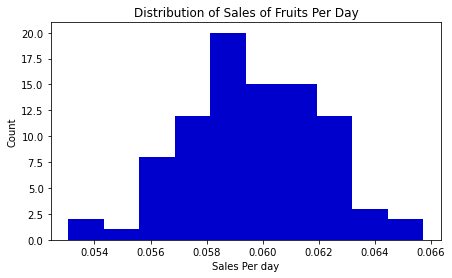

In [6]:
def sales_data_fruits():
    fig, ax = plt.subplots(figsize=(7,4))
    plt.hist(df.Fruits, color='mediumblue')
    
    ax.set(xlabel = "Sales Per day",
           ylabel = "Count",
           title = "Distribution of Sales of Fruits Per Day")
    
sales_data_fruits()

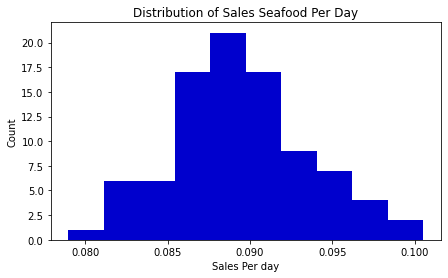

In [7]:
def sales_data_seafood():
    fig, ax = plt.subplots(figsize=(7,4))
    plt.hist(df.Seafood, color='mediumblue')
    
    ax.set(xlabel = "Sales Per day",
           ylabel = "Count",
           title = "Distribution of Sales Seafood Per Day")
    
sales_data_seafood()

In [8]:
prod_list=['Vegetables','Meat','Fruits','Seafood']
results = df[prod_list].sum(axis=0)
print(results)

Vegetables     9.857877
Meat          25.575442
Fruits         5.373000
Seafood        8.047648
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

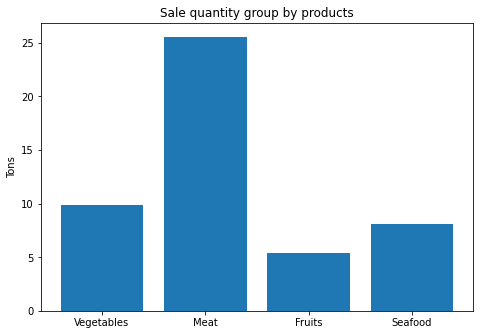

In [9]:
fig=plt.figure()
bg = fig.add_axes([0,0,1,1])
bg.bar(prod_list, results)
bg.set_ylabel('Tons')
bg.set_title('Sale quantity group by products')
plt.show

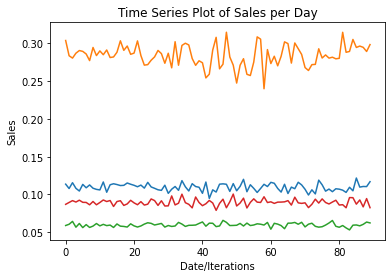

In [10]:
# Plot

plt.plot(df.Vegetables)
plt.plot(df.Meat)
plt.plot(df.Fruits)
plt.plot(df.Seafood)

# Labelling 

plt.xlabel("Date/Iterations")
plt.ylabel("Sales")
plt.title("Time Series Plot of Sales per Day")

# Display

plt.show()

# Seasonal decomposition for Forecasting Model

In [261]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [262]:
dfV = df.drop(df.columns[[2,3,4]], axis=1)
dfM = df.drop(df.columns[[1,3,4]], axis=1)
dfF = df.drop(df.columns[[1,2,4]], axis=1)
dfS = df.drop(df.columns[[1,2,3]], axis=1)


dfV.set_index('Date', inplace=True)
dfM.set_index('Date', inplace=True)
dfF.set_index('Date', inplace=True)
dfS.set_index('Date', inplace=True)

dfV, dfM, dfF, dfS

(            Vegetables
 Date                  
 2021-07-01    0.113667
 2021-07-02    0.107876
 2021-07-03    0.115584
 2021-07-04    0.108115
 2021-07-05    0.104577
 ...                ...
 2021-09-24    0.121770
 2021-09-25    0.109759
 2021-09-26    0.110591
 2021-09-27    0.110437
 2021-09-28    0.116939
 
 [90 rows x 1 columns],
                 Meat
 Date                
 2021-07-01  0.303852
 2021-07-02  0.283707
 2021-07-03  0.280579
 2021-07-04  0.287054
 2021-07-05  0.290579
 ...              ...
 2021-09-24  0.294669
 2021-09-25  0.296484
 2021-09-26  0.294840
 2021-09-27  0.289330
 2021-09-28  0.298473
 
 [90 rows x 1 columns],
               Fruits
 Date                
 2021-07-01  0.058907
 2021-07-02  0.060557
 2021-07-03  0.064354
 2021-07-04  0.056692
 2021-07-05  0.061578
 ...              ...
 2021-09-24  0.059621
 2021-09-25  0.058474
 2021-09-26  0.060452
 2021-09-27  0.063471
 2021-09-28  0.062333
 
 [90 rows x 1 columns],
              Seafood
 Date           

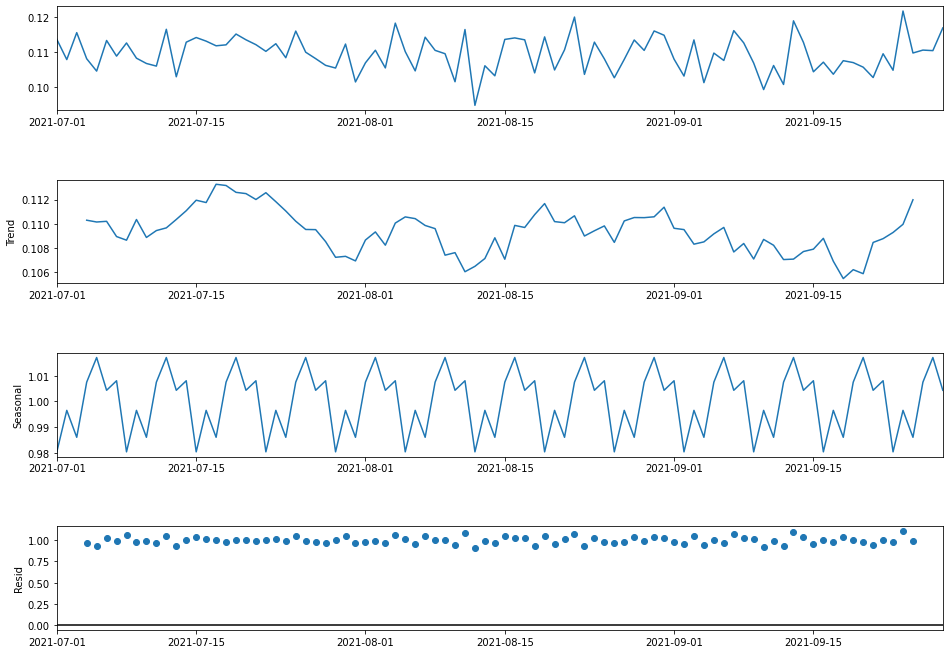

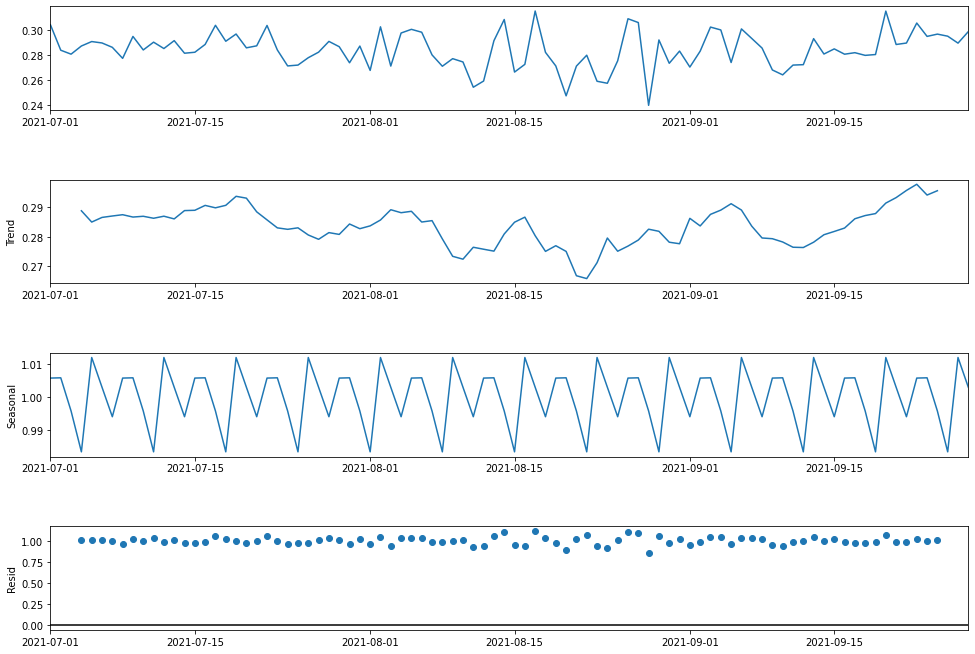

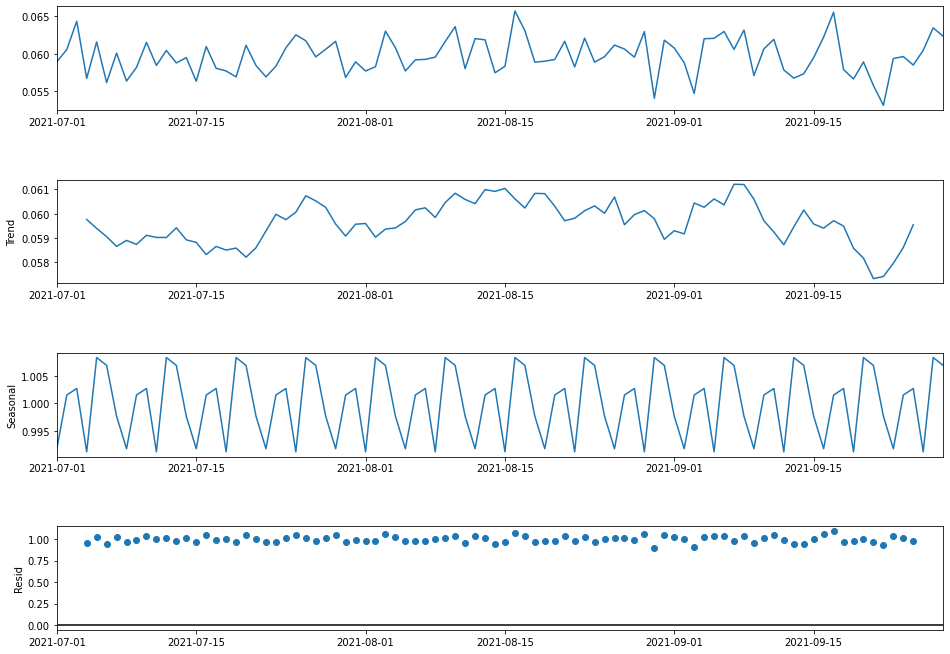

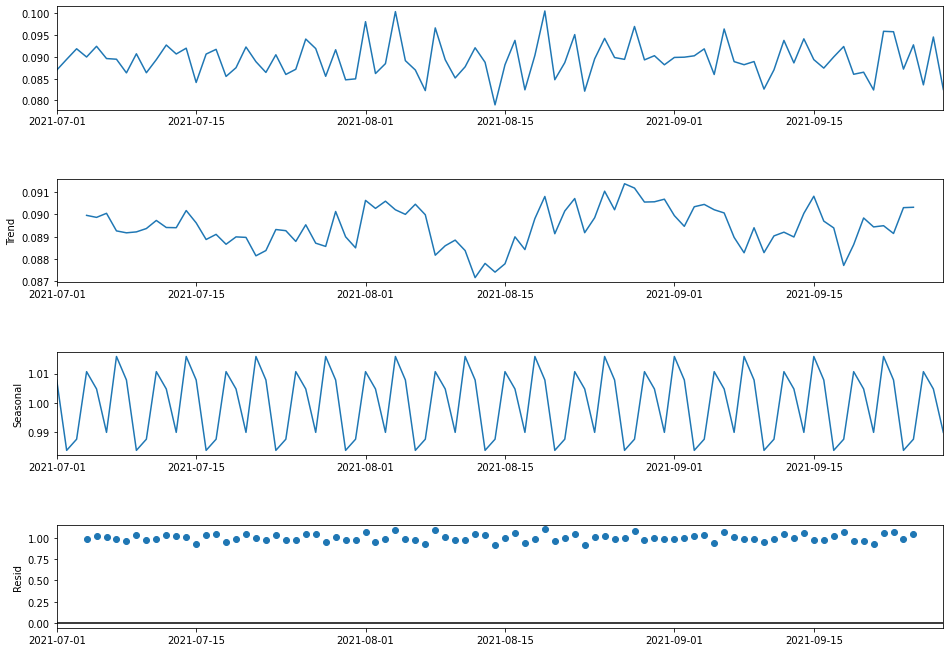

In [263]:
a=seasonal_decompose(dfV, model='multiplicative').plot()
b=seasonal_decompose(dfM, model='multiplicative').plot()
c=seasonal_decompose(dfF, model='multiplicative').plot()
d=seasonal_decompose(dfS, model='multiplicative').plot()
a.set_figheight(10)
a.set_figwidth(15)
b.set_figheight(10)
b.set_figwidth(15)
c.set_figheight(10)
c.set_figwidth(15)
d.set_figheight(10)
d.set_figwidth(15)

# Adfuller test

In [264]:
from statsmodels.tsa.stattools import adfuller

In [265]:
# ADF Test for Vegetables
result = adfuller(dfV, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -10.39327467503833
n_lags: 0
p-value: 1.995195292251891e-18
Critial Values:
   1%, -3.506057133647011
Critial Values:
   5%, -2.8946066061911946
Critial Values:
   10%, -2.5844100201994697


In [266]:
# ADF Test for Meat
result = adfuller(dfM, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -2.3027456809582314
n_lags: 7
p-value: 0.17108396390056352
Critial Values:
   1%, -3.512738056978279
Critial Values:
   5%, -2.8974898650628984
Critial Values:
   10%, -2.585948732897085


In [267]:
# ADF Test for Fruits
result = adfuller(dfF, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -3.8261738616825567
n_lags: 6
p-value: 0.002650592337267802
Critial Values:
   1%, -3.5117123057187376
Critial Values:
   5%, -2.8970475206326833
Critial Values:
   10%, -2.5857126912469153


In [268]:
# ADF Test for Seafood
result = adfuller(dfS, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -10.16043079618001
n_lags: 1
p-value: 7.533161662299776e-18
Critial Values:
   1%, -3.506944401824286
Critial Values:
   5%, -2.894989819214876
Critial Values:
   10%, -2.584614550619835


# Sale quantity Difference of Meat

AttributeError: 'AxesSubplot' object has no attribute 'show'

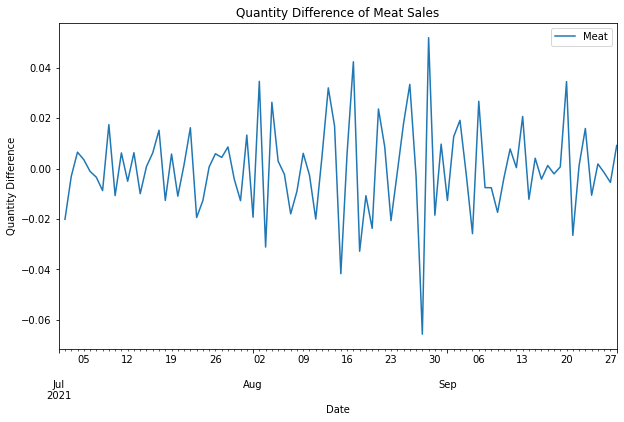

In [283]:
dfM1=dfM.diff()
dfMplot = dfM1.plot (legend=True, label='Train', title='Quantity Difference of Meat Sales',ylabel='Quantity Difference', figsize=(10,6))
dfMplot.show()

# ARIMA Forecasting Model

In [284]:
trainV= df.Vegetables[:61]
trainM= df.Meat[:61]
trainF= df.Fruits[:61]
trainS= df.Seafood[:61]

In [285]:
testV= df.Vegetables[60:]
testM= df.Meat[60:]
testF= df.Fruits[60:]
testS= df.Seafood[60:]

## Determining PDQ 

In [286]:
import pmdarima as pm
# fitting a stepwise model:
stepwise_fit = pm.auto_arima(dfV, start_p=1, start_q=1, max_p=5, max_q=5, m=3,
                             start_P=0, seasonal=False, d=2, D=1, trace=True,
                             error_action='ignore', 
                             suppress_warnings=True,  
                             stepwise=True)  
stepwise_fit.summary()

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (3) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-628.774, Time=0.45 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-503.838, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-573.387, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-505.828, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-619.258, Time=0.57 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-626.623, Time=0.65 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-621.905, Time=0.37 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-598.352, Time=0.21 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-604.780, Time=0.92 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.36 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0] intercept
Total fit time: 4.003 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   90
Model:               SARIMAX(1, 2, 1)   Log Likelihood                 318.387
Date:                Thu, 23 Jun 2022   AIC                           -628.774
Time:                        14:59:39   BIC                           -618.865
Sample:                             0   HQIC                          -624.782
                                 - 90                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.489e-05   9.68e-05      0.154      0.878      -0.000       0.000
ar.L1         -0.6359      0.091     -6.955      0.000      -0.815      -0.457
ma.L1         -0.8667      0.127     -6.800      0.000      -1.116      -0.617
sigma2      4.074e-05      8e-06      5.090      0.000    2.51e-05    5.64e-05
===================================================================================
Ljung-Box (L1) (Q):                   2.17   Jarque-Bera (JB):                 0.34
Prob(Q):                              0.14   Prob(JB):                         0.85
Heteroskedasticity (H):               2.14   Skew:                             0.05
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [287]:
import pmdarima as pm
# fitting a stepwise model:
stepwise_fit = pm.auto_arima(dfM, start_p=1, start_q=1, max_p=5, max_q=5, m=3,
                             start_P=0, seasonal=False, d=1, D=1, trace=True,
                             error_action='ignore',  
                             suppress_warnings=True, 
                             stepwise=True) 

stepwise_fit.summary()

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (3) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-495.154, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-457.221, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-468.296, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-495.728, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-459.220, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-492.595, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-492.975, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-497.692, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-497.141, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-497.464, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-470.296, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-495.570, Time=0.37 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.457 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   90
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 250.846
Date:                Thu, 23 Jun 2022   AIC                           -497.692
Time:                        14:59:54   BIC                           -492.715
Sample:                             0   HQIC                          -495.686
                                 - 90                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9013      0.052    -17.213      0.000      -1.004      -0.799
sigma2         0.0002   2.93e-05      6.980      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.27   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.26   Prob(JB):                         0.63
Heteroskedasticity (H):               2.08   Skew:                             0.12
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [288]:
import pmdarima as pm
# fitting a stepwise model:
stepwise_fit = pm.auto_arima(dfF, start_p=1, start_q=1, max_p=5, max_q=5, m=3,
                             start_P=0, seasonal=False, d=1, D=1, trace=True,
                             error_action='ignore',  
                             suppress_warnings=True,  
                             stepwise=True)  

stepwise_fit.summary()

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (3) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-794.941, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-755.505, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-773.957, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-793.572, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-757.494, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-798.783, Time=0.63 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-782.097, Time=0.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-787.598, Time=0.62 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-790.391, Time=1.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-801.887, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-794.883, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-795.630, Time=0.51 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-795.578, Time=0.77 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-781.887, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   90
Model:               SARIMAX(1, 1, 2)   Log Likelihood                 405.944
Date:                Thu, 23 Jun 2022   AIC                           -801.887
Time:                        15:00:02   BIC                           -789.444
Sample:                             0   HQIC                          -796.872
                                 - 90                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.146e-06   3.91e-05      0.106      0.916   -7.25e-05    8.08e-05
ar.L1         -0.8015     13.002     -0.062      0.951     -26.284      24.681
ma.L1         -0.1878     13.065     -0.014      0.989     -25.795      25.419
ma.L2         -0.7896     12.907     -0.061      0.951     -26.086      24.507
sigma2      6.121e-06   1.04e-06      5.881      0.000    4.08e-06    8.16e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.63   Prob(JB):                         0.80
Heteroskedasticity (H):               2.04   Skew:                            -0.17
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [289]:
import pmdarima as pm
# fitting a stepwise model:
stepwise_fit = pm.auto_arima(dfS, start_p=1, start_q=1, max_p=10, max_q=10, m=3,
                             start_P=0, seasonal=False, d=1, D=1, trace=True,
                             error_action='ignore',  
                             suppress_warnings=True,  
                             stepwise=True)  

stepwise_fit.summary()

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (3) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-706.596, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-640.364, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-662.456, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-711.164, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-642.359, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-678.408, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-698.443, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-713.191, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-664.455, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.50 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.775 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   90
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 358.596
Date:                Thu, 23 Jun 2022   AIC                           -713.191
Time:                        15:00:08   BIC                           -708.214
Sample:                             0   HQIC                          -711.185
                                 - 90                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9488      0.112     -8.456      0.000      -1.169      -0.729
sigma2      1.802e-05   3.11e-06      5.797      0.000    1.19e-05    2.41e-05
===================================================================================
Ljung-Box (L1) (Q):                   5.21   Jarque-Bera (JB):                 1.50
Prob(Q):                              0.02   Prob(JB):                         0.47
Heteroskedasticity (H):               1.94   Skew:                             0.30
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


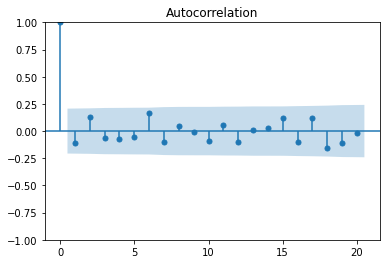

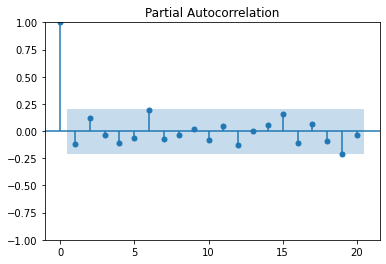

In [290]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf



acfV=plot_acf(dfV)#MA = 18 or 19
pacfV=plot_pacf(dfV)#AR = 19


c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


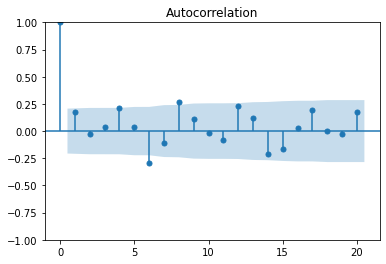

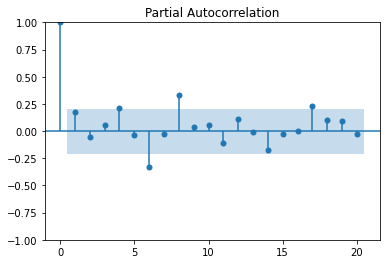

In [291]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


acfM=plot_acf(dfM) #MA = 5 6 7
pacfM=plot_pacf(dfM) #AR = 5 6 7

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


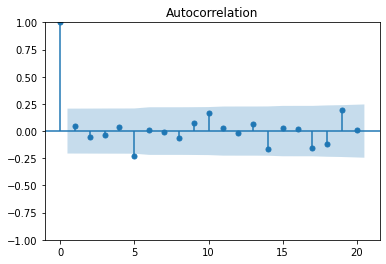

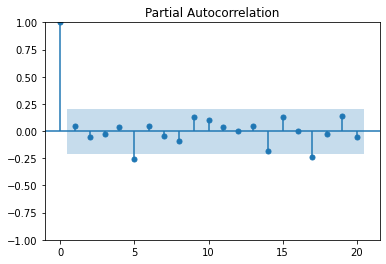

In [292]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


acfF=plot_acf(dfF)#MA = 5, 14, 16, 18
pacfF=plot_pacf(dfF) #AR= 5, 14, 17

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


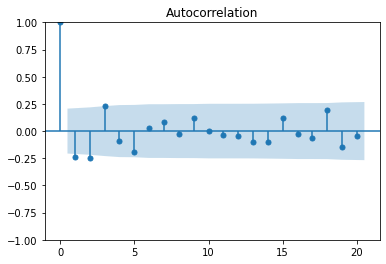

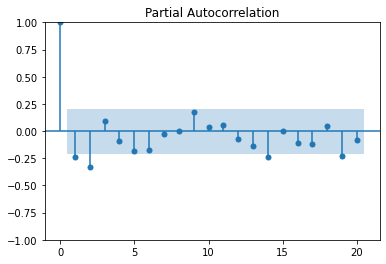

In [293]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_acf

acfS=plot_acf(dfS) #MA = 1 3
pacfS=plot_pacf(dfS) #AR = 3

## Model Fitting and Forecasting

In [294]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [295]:
modelV=SARIMAX(testV,order=(18,1,19)).fit()
modelM=SARIMAX(testM,order=(6,1,6)).fit()
modelF=SARIMAX(testF,order=(5,1,5)).fit()
modelS=SARIMAX(testS,order=(2,1,19)).fit()

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py

In [296]:
forecastV=modelV.get_prediction(start=-29)
forecastM=modelM.get_prediction(start=-29)
forecastF=modelF.get_prediction(start=-29)
forecastS=modelS.get_prediction(start=-29)

In [297]:
meanfcV=forecastV.predicted_mean
meanfcM=forecastM.predicted_mean
meanfcF=forecastF.predicted_mean
meanfcS=forecastS.predicted_mean
meanfcV, meanfcM, meanfcF, meanfcS

(61    0.116064
 62    0.115377
 63    0.111491
 64    0.107502
 65    0.112006
 66    0.111387
 67    0.105978
 68    0.106463
 69    0.113511
 70    0.113601
 71    0.103313
 72    0.105904
 73    0.100510
 74    0.111925
 75    0.115286
 76    0.108000
 77    0.104942
 78    0.106800
 79    0.106386
 80    0.109664
 81    0.102382
 82    0.106556
 83    0.106909
 84    0.105478
 85    0.116006
 86    0.104594
 87    0.111357
 88    0.106863
 89    0.114707
 Name: predicted_mean, dtype: float64,
 61    0.273344
 62    0.283020
 63    0.270344
 64    0.282976
 65    0.302062
 66    0.299782
 67    0.273967
 68    0.300607
 69    0.293041
 70    0.285418
 71    0.268046
 72    0.264158
 73    0.271913
 74    0.272249
 75    0.292879
 76    0.280687
 77    0.284762
 78    0.280554
 79    0.281749
 80    0.279627
 81    0.280287
 82    0.314733
 83    0.288249
 84    0.289400
 85    0.305262
 86    0.294669
 87    0.296484
 88    0.294840
 89    0.289330
 Name: predicted_mean, dtype: flo

In [298]:
ciV=forecastV.conf_int()
ciM=forecastM.conf_int()
ciF=forecastF.conf_int()
ciS=forecastS.conf_int()

## Forecasting plots

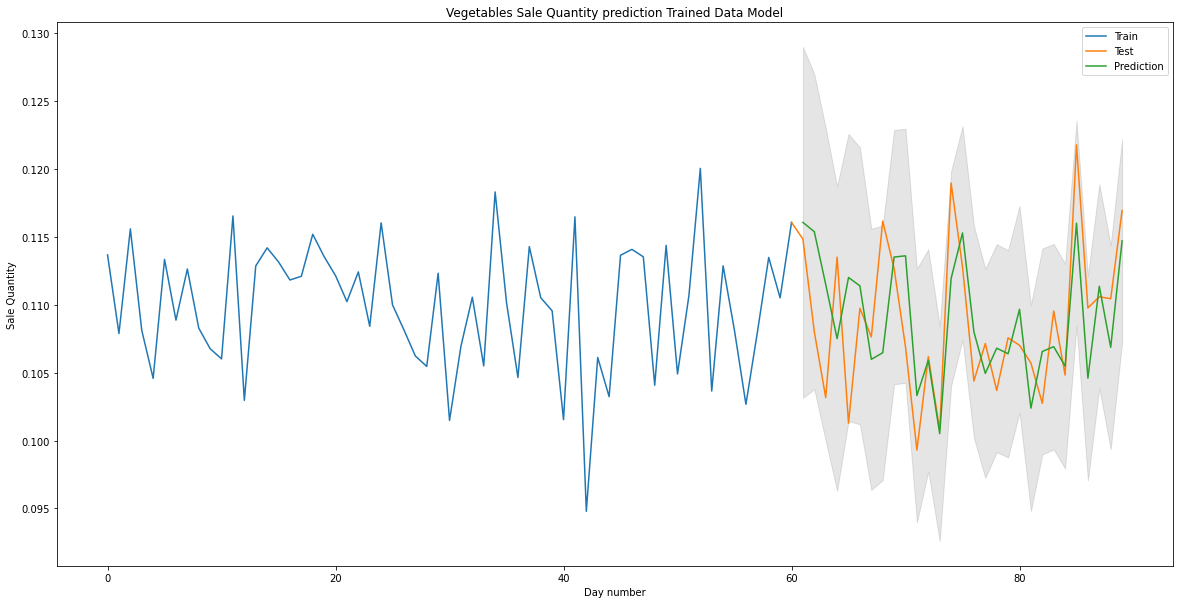

In [299]:
trainV.plot(legend=True, label='Train', ylabel='Sale Quantity', xlabel='Day number',title='Vegetables Sale Quantity prediction Trained Data Model',figsize=(20,10))
testV.plot(legend=True, label='Test')
meanfcV.plot(legend=True, label='Prediction')
plt.fill_between(ciV.index,
                ciV.iloc[:, 0],
                ciV.iloc[:, 1], color='k', alpha=.1)

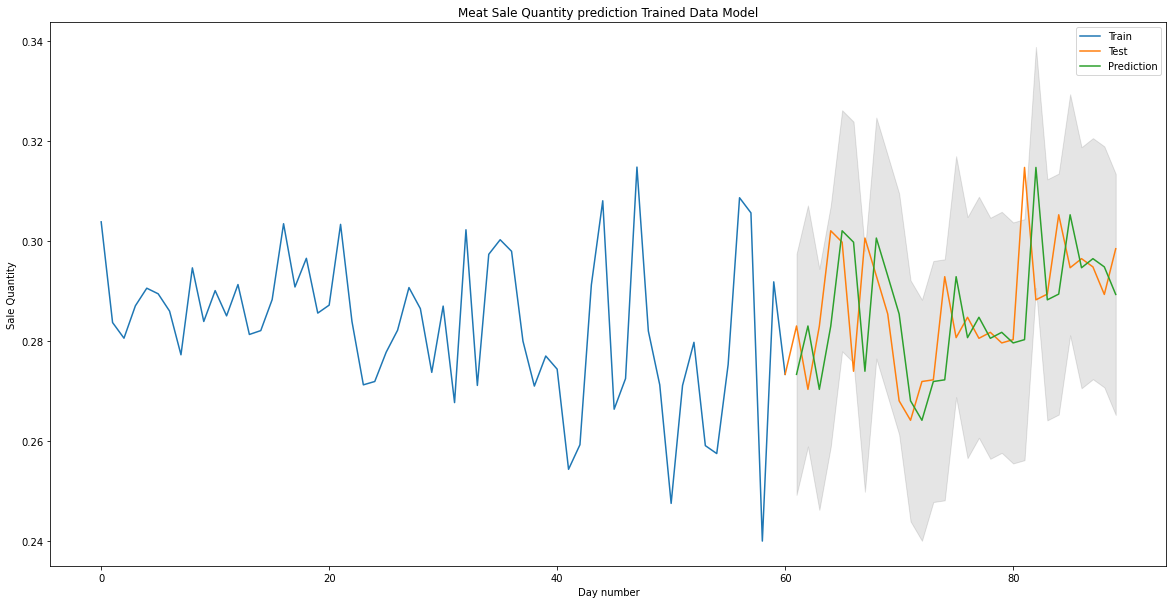

In [300]:
trainM.plot(legend=True, label='Train',  ylabel='Sale Quantity', xlabel='Day number',title='Meat Sale Quantity prediction Trained Data Model',figsize=(20,10))
testM.plot(legend=True, label='Test')
meanfcM.plot(legend=True, label='Prediction')
plt.fill_between(ciM.index,
                ciM.iloc[:, 0],
                ciM.iloc[:, 1], color='k', alpha=.1)

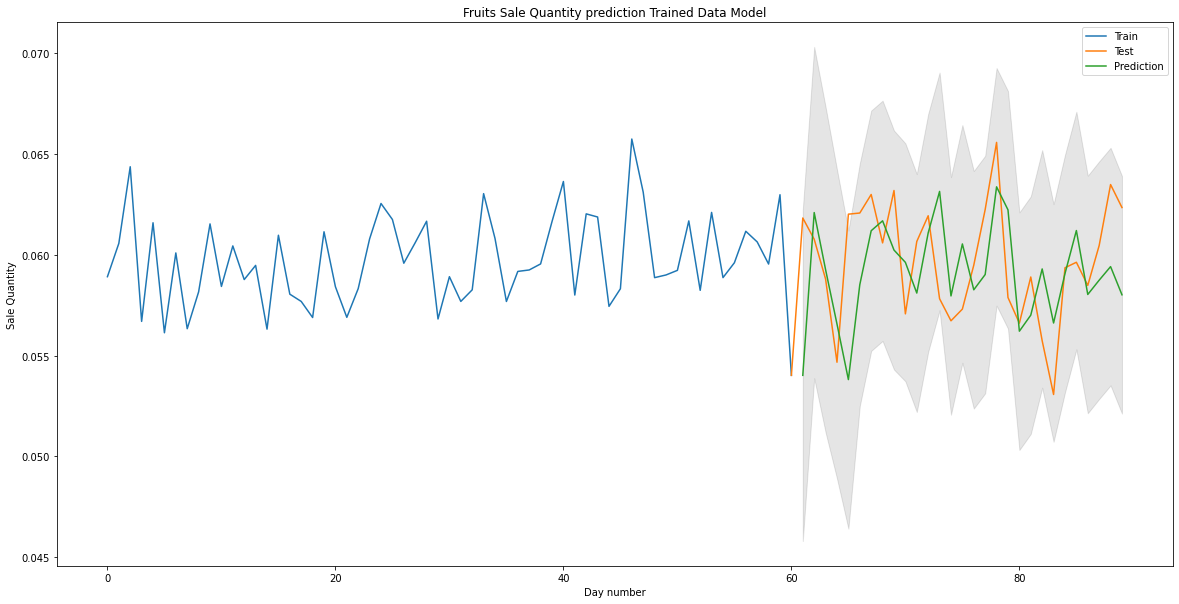

In [301]:
trainF.plot(legend=True, label='Train', ylabel='Sale Quantity', xlabel='Day number',title='Fruits Sale Quantity prediction Trained Data Model', figsize=(20,10))
testF.plot(legend=True, label='Test')
meanfcF.plot(legend=True, label='Prediction')
plt.fill_between(ciF.index,
                ciF.iloc[:, 0],
                ciF.iloc[:, 1], color='k', alpha=.1)

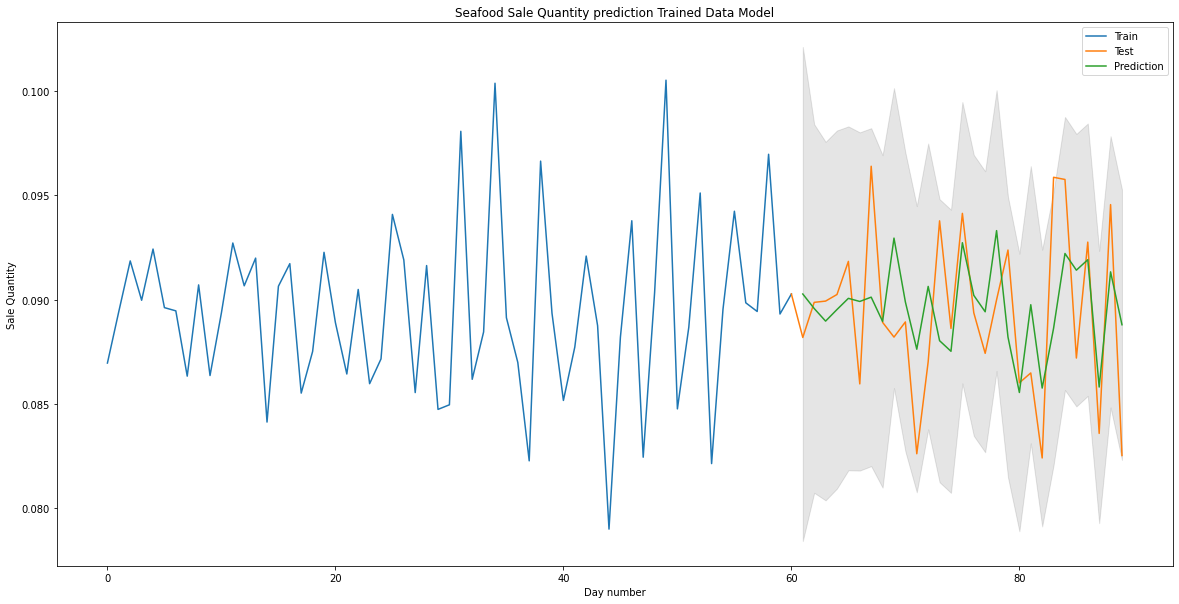

In [302]:
trainS.plot(legend=True, label='Train',ylabel='Sale Quantity', xlabel='Day number',title='Seafood Sale Quantity prediction Trained Data Model', figsize=(20,10))
testS.plot(legend=True, label='Test')
meanfcS.plot(legend=True, label='Prediction')
plt.fill_between(ciS.index,
                ciS.iloc[:, 0],
                ciS.iloc[:, 1], color='k', alpha=.1)

# ARIMA Model Evaluation

In [303]:
from sklearn.metrics import mean_squared_error

In [304]:
testV=df.Vegetables[:29]
testM=df.Meat[:29]
testF=df.Fruits[:29]
testS=df.Seafood[:29]

In [305]:
rmseV=np.sqrt(mean_squared_error(testV,meanfcV))
rmseM=np.sqrt(mean_squared_error(testM,meanfcM))
rmseF=np.sqrt(mean_squared_error(testF,meanfcF))
rmseS=np.sqrt(mean_squared_error(testS,meanfcS))
rmseV, rmseM, rmseF, rmseS

(0.005427803526726115,
 0.014861259570670962,
 0.0033912510920257885,
 0.0037876131400840416)

In [306]:
testV=df.Vegetables[:29]
testM=df.Meat[:29]
testF=df.Fruits[:29]
testS=df.Seafood[:29]
from sklearn.metrics import mean_absolute_error
maeV=mean_absolute_error(testV,meanfcV)
maeM=mean_absolute_error(testM,meanfcM)
maeF=mean_absolute_error(testF,meanfcF)
maeS=mean_absolute_error(testS,meanfcS)
maeV, maeM, maeF, maeS

(0.004596310019153448,
 0.01233353579008566,
 0.0027885575780822766,
 0.0029944251272736974)

In [307]:
aeV1=testV.mean(), np.sqrt(meanfcV.var())
aeV2=testM.mean(), np.sqrt(meanfcM.var())
aeV3=testF.mean(), np.sqrt(meanfcF.var())
aeV4=testS.mean(), np.sqrt(meanfcS.var())
aeV1, aeV2, aeV3, aeV4

((0.11058836334482759, 0.004392598545021366),
 (0.2871178550344828, 0.012177010408049643),
 (0.0594100668275862, 0.002398704030840556),
 (0.08936531513793104, 0.0020410272829076413))

In [308]:
testV=df.Vegetables[:29]
testM=df.Meat[:29]
testF=df.Fruits[:29]
testS=df.Seafood[:29]
from sklearn.metrics import mean_absolute_error
mapeV = mean_absolute_error(testV,meanfcV)*100
mapeM = mean_absolute_error(testM,meanfcM)*100
mapeF = mean_absolute_error(testF,meanfcF)*100
mapeS = mean_absolute_error(testS,meanfcS)*100
mapeV, mapeM, mapeF, mapeS

(0.4596310019153448,
 1.233353579008566,
 0.27885575780822763,
 0.29944251272736977)

# Final ARIMA Forecasting Model

In [309]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [310]:
finalV= df.Vegetables
finalM= df.Meat.diff()
finalF= df.Fruits
finalS= df.Seafood


In [311]:
fmodelV=SARIMAX(finalV,order=(18,1,19)).fit()
fmodelM=SARIMAX(finalM,order=(6,1,6)).fit()
fmodelF=SARIMAX(finalF,order=(5,1,5)).fit()
fmodelS=SARIMAX(finalS,order=(2,1,19)).fit()

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using 

In [312]:
fforecastV=fmodelV.get_prediction(start=89, end=100)
fforecastM=fmodelM.get_prediction(start=89, end=100)
fforecastF=fmodelF.get_prediction(start=89, end=100)
fforecastS=fmodelS.get_prediction(start=89, end=100)

In [313]:
fmeanfcV=fforecastV.predicted_mean
fmeanfcM=fforecastM.predicted_mean
fmeanfcF=fforecastF.predicted_mean
fmeanfcS=fforecastS.predicted_mean
fmeanfcV, fmeanfcM, fmeanfcF, fmeanfcS

(89     0.111216
 90     0.106523
 91     0.113957
 92     0.107972
 93     0.107583
 94     0.111305
 95     0.111084
 96     0.111110
 97     0.110402
 98     0.110510
 99     0.109952
 100    0.115174
 Name: predicted_mean, dtype: float64,
 89     0.010896
 90    -0.005176
 91    -0.002075
 92     0.001894
 93     0.001965
 94     0.000910
 95    -0.003621
 96     0.000323
 97     0.003442
 98    -0.000267
 99    -0.001931
 100   -0.000494
 Name: predicted_mean, dtype: float64,
 89     0.059664
 90     0.059969
 91     0.059564
 92     0.059681
 93     0.058938
 94     0.059351
 95     0.059763
 96     0.059767
 97     0.059623
 98     0.059864
 99     0.059715
 100    0.059671
 Name: predicted_mean, dtype: float64,
 89     0.086188
 90     0.090586
 91     0.090046
 92     0.086556
 93     0.090322
 94     0.091182
 95     0.091831
 96     0.087231
 97     0.089819
 98     0.085972
 99     0.091192
 100    0.087281
 Name: predicted_mean, dtype: float64)

In [314]:
fciV=fforecastV.conf_int()
fciM=fforecastM.conf_int()
fciF=fforecastF.conf_int()
fciS=fforecastS.conf_int()

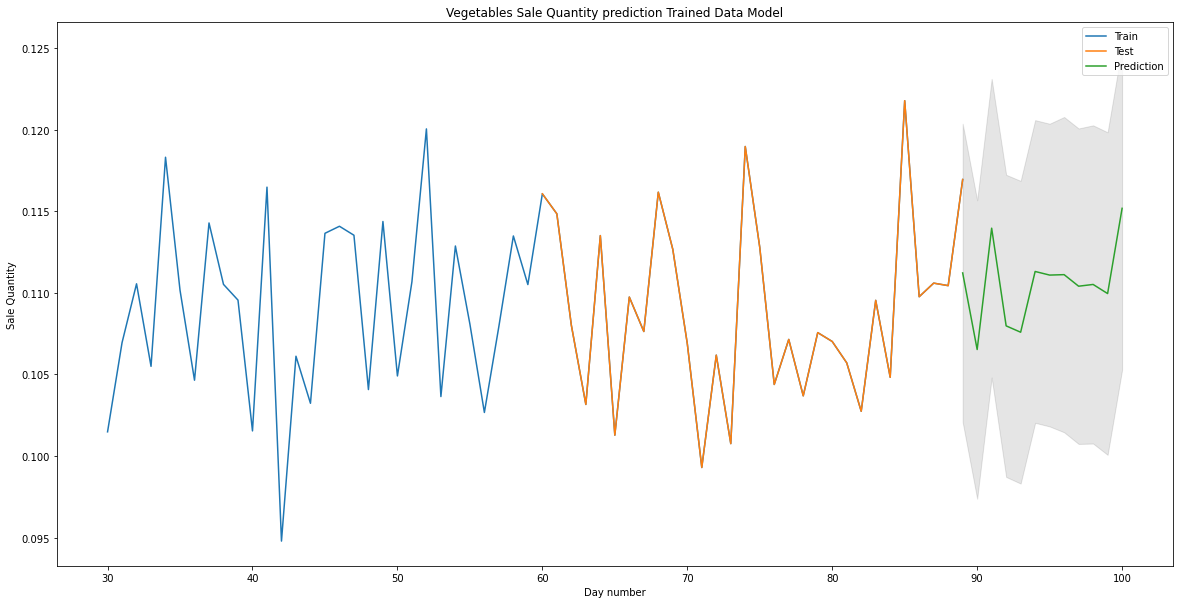

In [315]:
trainVf=finalV[30:]
testVf=finalV[60:]
trainVf.plot(legend=True, label='Train', ylabel='Sale Quantity', xlabel='Day number',title='Vegetables Sale Quantity prediction Trained Data Model',figsize=(20,10))
testVf.plot(legend=True, label='Test')
fmeanfcV.plot(legend=True, label='Prediction')
plt.fill_between(fciV.index,
                fciV.iloc[:, 0],
                fciV.iloc[:, 1], color='k', alpha=.1)

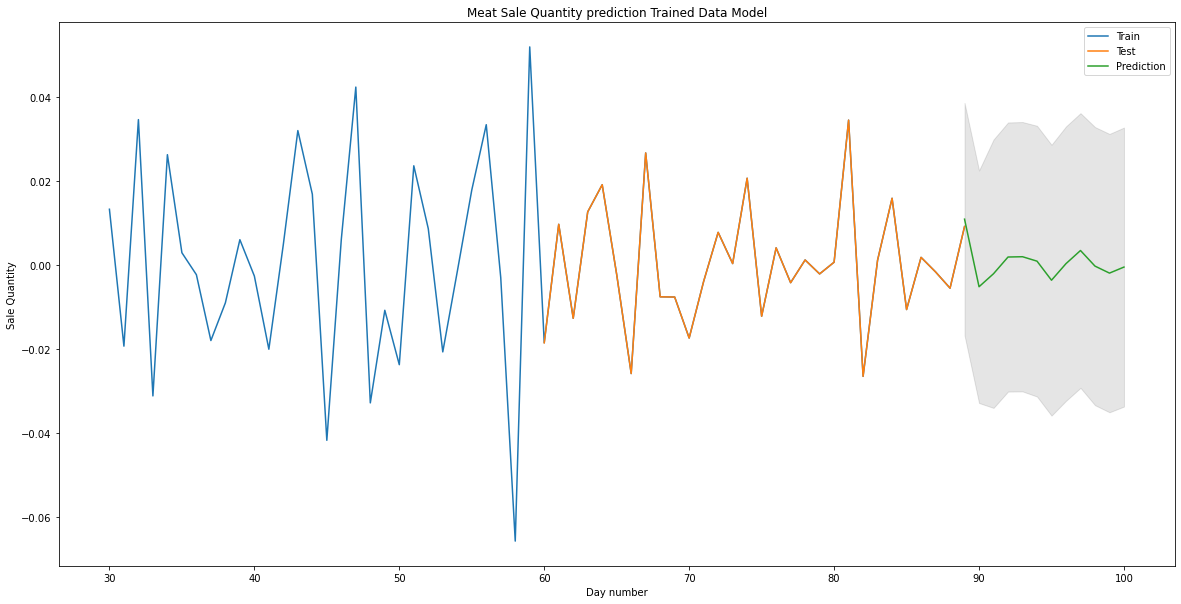

In [316]:
trainMf=finalM[30:]
testM=finalM[60:]
trainMf.plot(legend=True, label='Train',  ylabel='Sale Quantity', xlabel='Day number',title='Meat Sale Quantity prediction Trained Data Model',figsize=(20,10))
testM.plot(legend=True, label='Test')
fmeanfcM.plot(legend=True, label='Prediction')
plt.fill_between(fciM.index,
                fciM.iloc[:, 0],
                fciM.iloc[:, 1], color='k', alpha=.1)

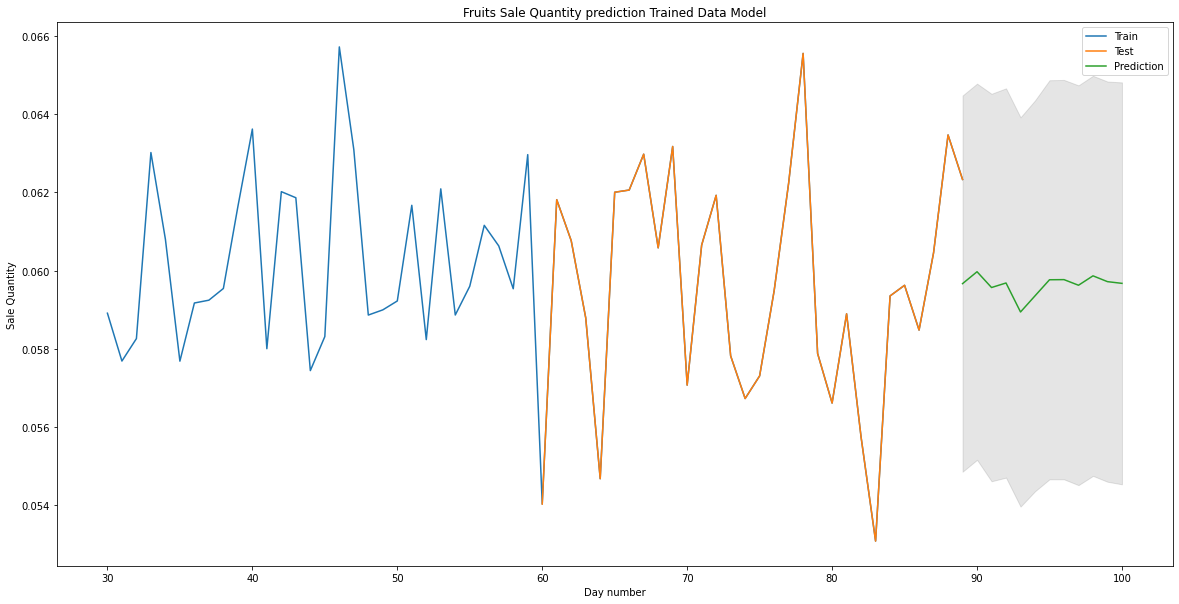

In [317]:
trainFf=finalF[30:]
testFf=finalF[60:]
trainFf.plot(legend=True, label='Train', ylabel='Sale Quantity', xlabel='Day number',title='Fruits Sale Quantity prediction Trained Data Model', figsize=(20,10))
testFf.plot(legend=True, label='Test')
fmeanfcF.plot(legend=True, label='Prediction')
plt.fill_between(fciF.index,
                fciF.iloc[:, 0],
                fciF.iloc[:, 1], color='k', alpha=.1)

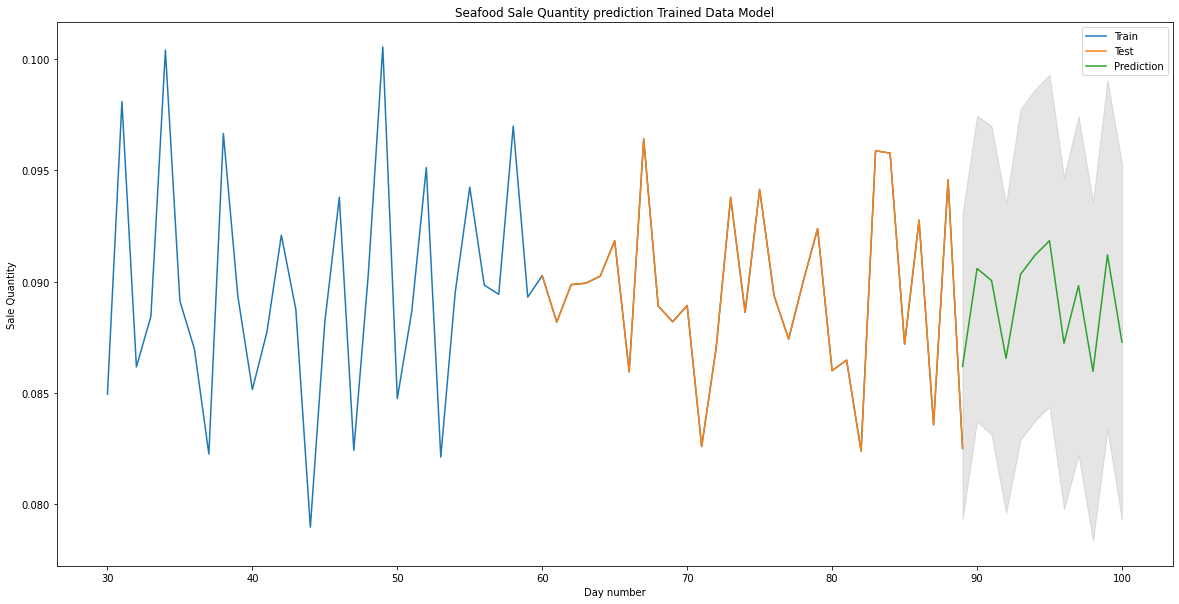

In [318]:
trainSf=finalS[30:]
testSf=finalS[60:]
trainSf.plot(legend=True, label='Train',ylabel='Sale Quantity', xlabel='Day number',title='Seafood Sale Quantity prediction Trained Data Model', figsize=(20,10))
testSf.plot(legend=True, label='Test')
fmeanfcS.plot(legend=True, label='Prediction')
plt.fill_between(fciS.index,
                fciS.iloc[:, 0],
                fciS.iloc[:, 1], color='k', alpha=.1)

# Exponential Smoothing Forecasting Model

In [319]:
trainV= df.Vegetables[:61]
trainM= df.Meat[:61]
trainF= df.Fruits[:61]
trainS= df.Seafood[:61]

In [320]:
testV= df.Vegetables[60:]
testM= df.Meat[60:]
testF= df.Fruits[60:]
testS= df.Seafood[60:]

In [321]:
prod_list=['Vegetables','Meat','Fruits','Seafood']
results = df[prod_list].sum(axis=0)
print(results)

Vegetables     9.857877
Meat          25.575442
Fruits         5.373000
Seafood        8.047648
dtype: float64


In [322]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [323]:
hwV=ExponentialSmoothing(trainV,trend='mul',seasonal='mul',seasonal_periods=30).fit()
predV1=hwV.forecast(30)

<AxesSubplot:title={'center':'Vegtables Sale Quantity prediction Trained Data Model'}, xlabel='Day number', ylabel='Sale Quantity'>

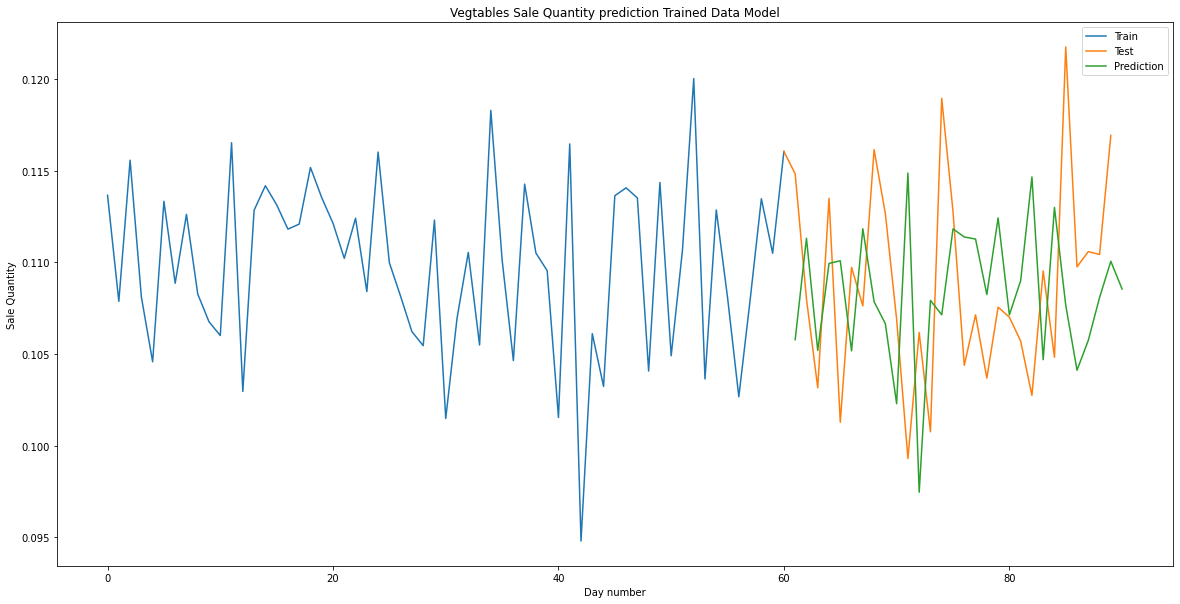

In [324]:
trainV.plot(legend=True, label='Train', ylabel='Sale Quantity', xlabel='Day number',title='Vegtables Sale Quantity prediction Trained Data Model', figsize=(20,10))
testV.plot(legend=True, label='Test')
predV1.plot(legend=True, label='Prediction')

In [325]:
testM= df.Meat[60:]
trainM= df.Meat[:61]
hwM=ExponentialSmoothing(trainM,trend='mul',seasonal='mul',seasonal_periods=30).fit()
predM1=hwM.forecast(30)
predM1

61    0.265279
62    0.280023
63    0.268512
64    0.282593
65    0.283415
66    0.280630
67    0.267870
68    0.272097
69    0.269705
70    0.271474
71    0.259547
72    0.264940
73    0.275102
74    0.283426
75    0.266700
76    0.276976
77    0.290966
78    0.278137
79    0.267694
80    0.257199
81    0.276274
82    0.270916
83    0.254939
84    0.254512
85    0.265807
86    0.283773
87    0.286495
88    0.253280
89    0.271685
90    0.273509
dtype: float64

<AxesSubplot:title={'center':'Meat Sale Quantity prediction Trained Data Model'}, xlabel='Day number', ylabel='Sale Quantity'>

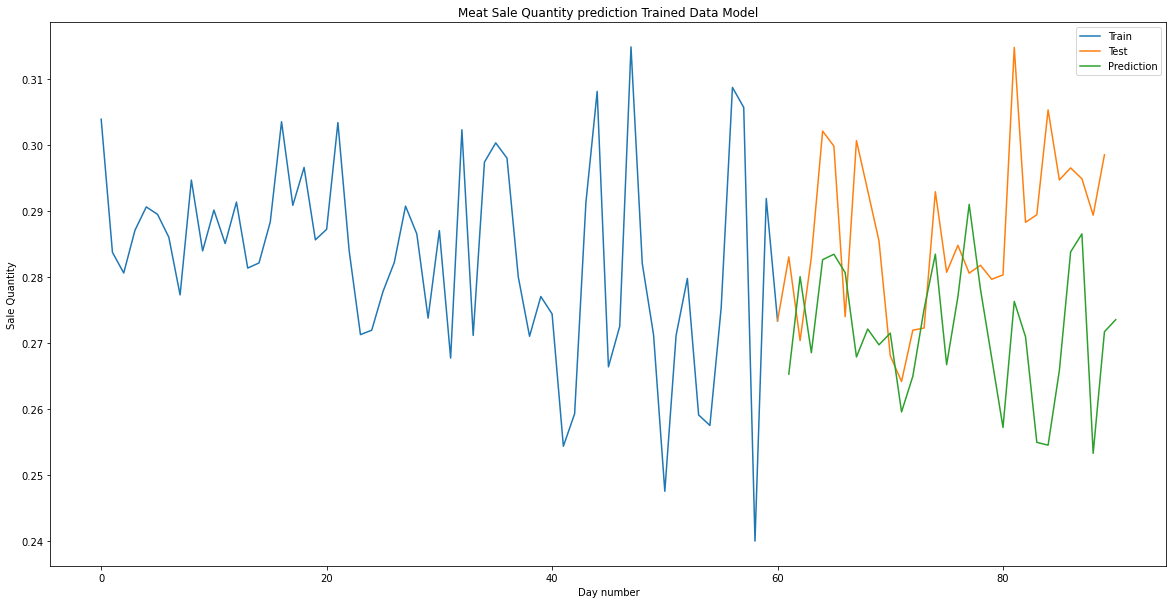

In [326]:
trainM.plot(legend=True, label='Train',ylabel='Sale Quantity', xlabel='Day number',title='Meat Sale Quantity prediction Trained Data Model', figsize=(20,10))
testM.plot(legend=True, label='Test')
predM1.plot(legend=True, label='Prediction')

In [327]:
hwF=ExponentialSmoothing(trainF,trend='mul',seasonal='mul',seasonal_periods=30).fit()
predF1=hwF.forecast(30)
predF1

61    0.058066
62    0.058446
63    0.063111
64    0.060906
65    0.057813
66    0.059228
67    0.059238
68    0.059531
69    0.061683
70    0.063789
71    0.058172
72    0.062193
73    0.062088
74    0.057594
75    0.062002
76    0.059096
77    0.058891
78    0.058088
79    0.062343
80    0.059569
81    0.058025
82    0.059459
83    0.061911
84    0.063684
85    0.062799
86    0.060563
87    0.061598
88    0.062595
89    0.057636
90    0.059800
dtype: float64

<AxesSubplot:title={'center':'Frutis Sale Quantity prediction Trained Data Model'}, xlabel='Day number', ylabel='Sale Quantity'>

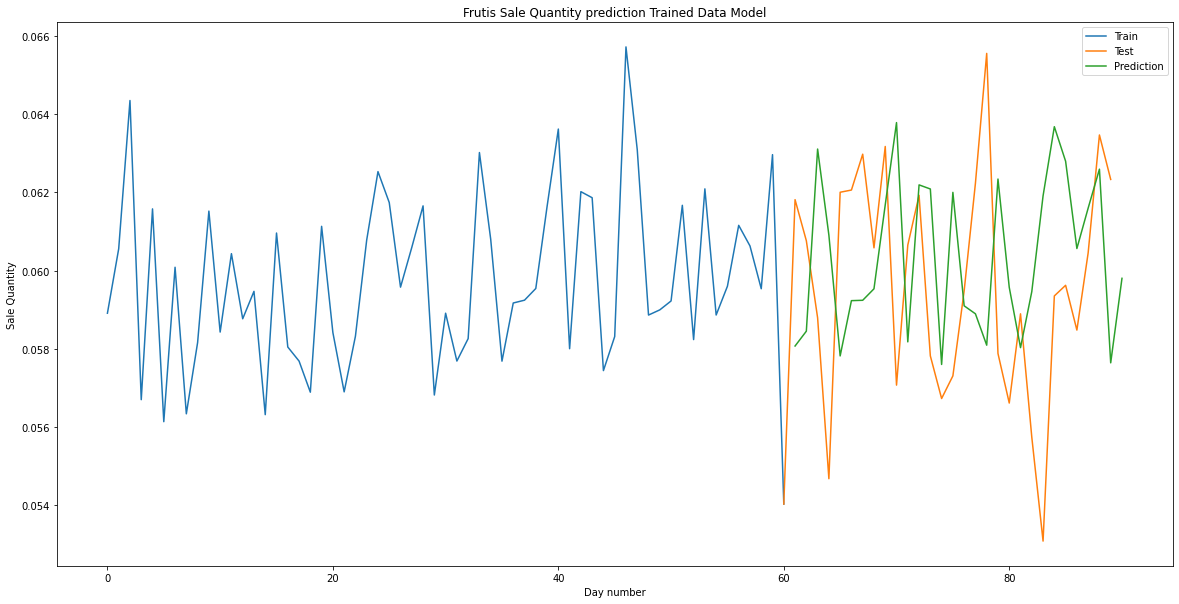

In [328]:
trainF.plot(legend=True, label='Train', ylabel='Sale Quantity', xlabel='Day number',title='Frutis Sale Quantity prediction Trained Data Model', figsize=(20,10))
testF.plot(legend=True, label='Test')
predF1.plot(legend=True, label='Prediction')

In [329]:
hwS=ExponentialSmoothing(trainS,trend='mul',seasonal='mul',seasonal_periods=30).fit()
predS1=hwS.forecast(30)
predS1

61    0.095372
62    0.090302
63    0.090560
64    0.098005
65    0.090717
66    0.089509
67    0.085488
68    0.095146
69    0.089180
70    0.088473
71    0.091457
72    0.092704
73    0.091614
74    0.082640
75    0.090683
76    0.094033
77    0.085145
78    0.090126
79    0.097678
80    0.088006
81    0.088712
82    0.094020
83    0.085160
84    0.089492
85    0.095381
86    0.092042
87    0.088591
88    0.095490
89    0.088107
90    0.089765
dtype: float64

<AxesSubplot:title={'center':'Seafood Sale Quantity prediction Trained Data Model'}, xlabel='Day number', ylabel='Sale Quantity'>

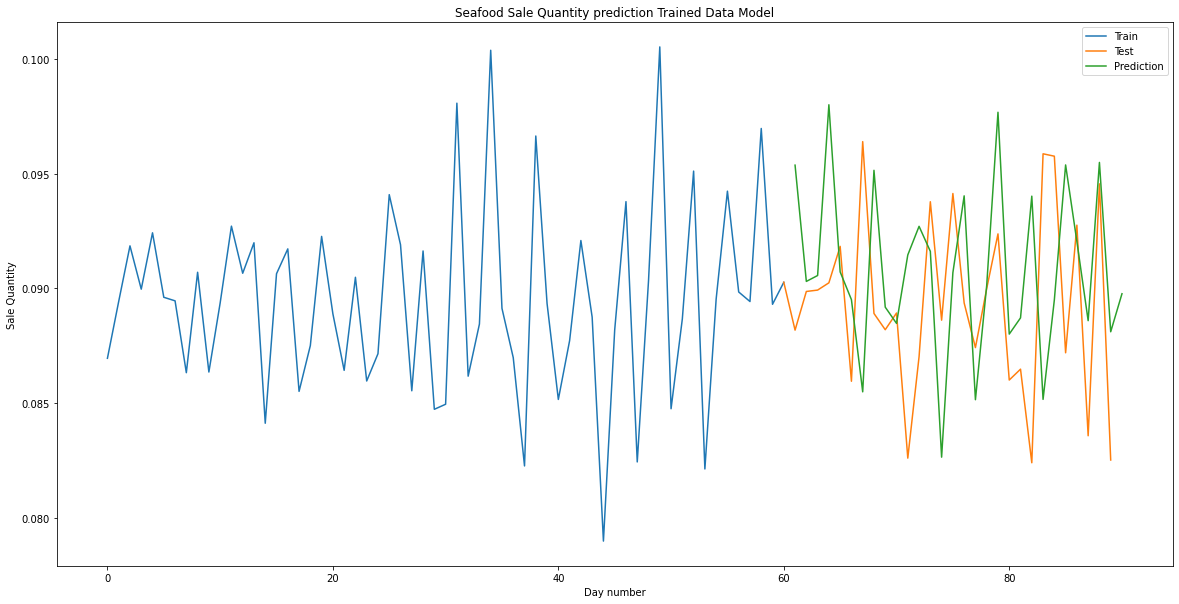

In [330]:
trainS.plot(legend=True, label='Train',ylabel='Sale Quantity', xlabel='Day number',title='Seafood Sale Quantity prediction Trained Data Model', figsize=(20,10))
testS.plot(legend=True, label='Test')
predS1.plot(legend=True, label='Prediction')

## Model Evaluation

In [331]:
from sklearn.metrics import mean_squared_error

In [332]:
testV=df.Vegetables[:30]
testM=df.Meat[:30]
testF=df.Fruits[:30]
testS=df.Seafood[:30]
eV=np.sqrt(mean_squared_error(testV,predV1))
eM=np.sqrt(mean_squared_error(testM,predM1))
eF=np.sqrt(mean_squared_error(testF,predF1))
eS=np.sqrt(mean_squared_error(testS,predS1))
eV, eM, eF, eS

(0.006241131696801004,
 0.0190245080438859,
 0.002746430835636942,
 0.005456376203342737)

In [333]:
testV=df.Vegetables[:30]
testM=df.Meat[:30]
testF=df.Fruits[:30]
testS=df.Seafood[:30]
from sklearn.metrics import mean_absolute_error
maeV=mean_absolute_error(testV,predV1)
maeM=mean_absolute_error(testM,predM1)
maeF=mean_absolute_error(testF,predF1)
maeS=mean_absolute_error(testS,predS1)
maeV, maeM, maeF, maeS

(0.005137781742883416,
 0.015718754834328705,
 0.0023363275895549253,
 0.0044530115825790915)

In [334]:
eV1=dfV.mean(), np.sqrt(dfV.var())
eV2=dfM.mean(), np.sqrt(dfM.var())
eV3=dfF.mean(), np.sqrt(dfF.var())
eV4=dfS.mean(), np.sqrt(dfS.var())
eV1, eV2, eV3, eV4

((Vegetables    0.109532
  dtype: float64,
  Vegetables    0.005076
  dtype: float64),
 (Meat    0.284172
  dtype: float64,
  Meat    0.014274
  dtype: float64),
 (Fruits    0.0597
  dtype: float64,
  Fruits    0.002467
  dtype: float64),
 (Seafood    0.089418
  dtype: float64,
  Seafood    0.004148
  dtype: float64))

In [335]:
from sklearn.metrics import mean_absolute_error
mapeV1 = mean_absolute_error(testV,predV1)*100
mapeM1 = mean_absolute_error(testM,predM1)*100
mapeF1 = mean_absolute_error(testF,predF1)*100
mapeS1 = mean_absolute_error(testS,predS1)*100
mapeV1, mapeM1, mapeF1, mapeS1

(0.5137781742883416,
 1.5718754834328705,
 0.23363275895549254,
 0.44530115825790917)

# Final Exponential Smoothing Forecasting Model

In [336]:
finV=ExponentialSmoothing(dfV,trend='mul',seasonal='mul',seasonal_periods=30).fit()
pred_finV=finV.forecast(10)
pred_finV

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2021-09-29    0.108773
2021-09-30    0.108255
2021-10-01    0.109764
2021-10-02    0.104048
2021-10-03    0.110452
2021-10-04    0.106696
2021-10-05    0.106159
2021-10-06    0.109882
2021-10-07    0.109982
2021-10-08    0.108025
Freq: D, dtype: float64

In [337]:
finM=ExponentialSmoothing(dfM,trend='mul',seasonal='mul',seasonal_periods=30).fit()
pred_finM=finM.forecast(10)
pred_finM

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2021-09-29    0.297293
2021-09-30    0.286788
2021-10-01    0.293439
2021-10-02    0.289057
2021-10-03    0.305828
2021-10-04    0.305706
2021-10-05    0.295024
2021-10-06    0.294729
2021-10-07    0.295075
2021-10-08    0.290925
Freq: D, dtype: float64

In [338]:
finF=ExponentialSmoothing(dfF,trend='mul',seasonal='mul',seasonal_periods=30).fit()
pred_finF=finF.forecast(10)
pred_finF

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2021-09-29    0.057418
2021-09-30    0.060177
2021-10-01    0.061280
2021-10-02    0.059666
2021-10-03    0.059165
2021-10-04    0.058771
2021-10-05    0.060605
2021-10-06    0.059691
2021-10-07    0.059595
2021-10-08    0.062289
Freq: D, dtype: float64

In [339]:
finS=ExponentialSmoothing(dfS,trend='mul',seasonal='mul',seasonal_periods=30).fit()
pred_finS=finS.forecast(10)
pred_finS

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2021-09-29    0.087660
2021-09-30    0.092164
2021-10-01    0.089566
2021-10-02    0.089723
2021-10-03    0.094638
2021-10-04    0.090479
2021-10-05    0.087737
2021-10-06    0.088640
2021-10-07    0.092379
2021-10-08    0.088262
Freq: D, dtype: float64

<AxesSubplot:title={'center':'Vegetables Sale Quantity Prediction Model'}, xlabel='Date', ylabel='Sale Quantity'>

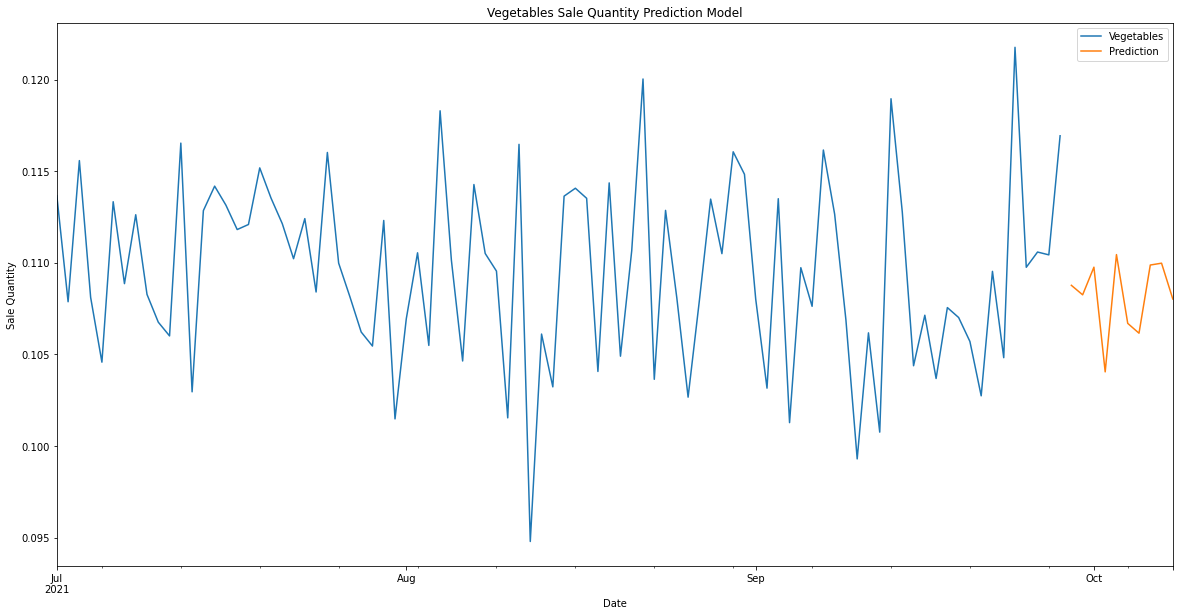

In [344]:
dfV.plot(legend=True, label='Past Sales Quantity',ylabel='Sale Quantity', xlabel='Date',title='Vegetables Sale Quantity Prediction Model', figsize=(20,10))
pred_finV.plot(legend=True, label='Prediction')

<AxesSubplot:title={'center':'Meat Sale Quantity Prediction Model'}, xlabel='Date', ylabel='Sale Quantity'>

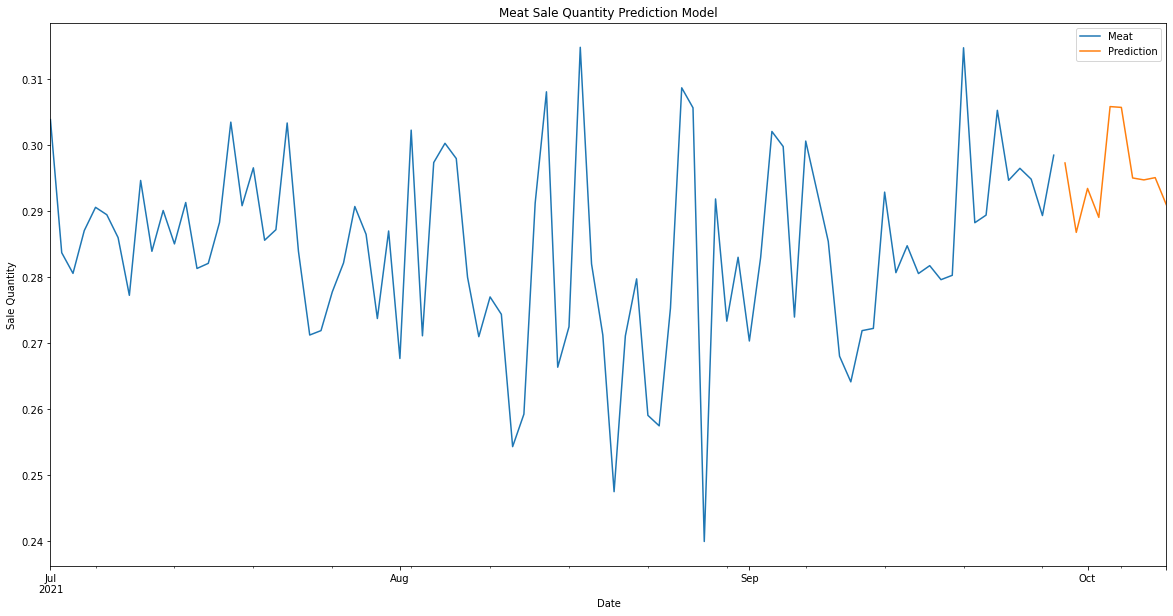

In [341]:
dfM.plot(legend=True, label='Past Meat Sales Quantity',ylabel='Sale Quantity', xlabel='Date',title='Meat Sale Quantity Prediction Model',figsize=(20,10))
pred_finM.plot(legend=True, label='Prediction')

<AxesSubplot:title={'center':'Fruits Sale Quantity Prediction Model'}, xlabel='Date', ylabel='Sale Quantity'>

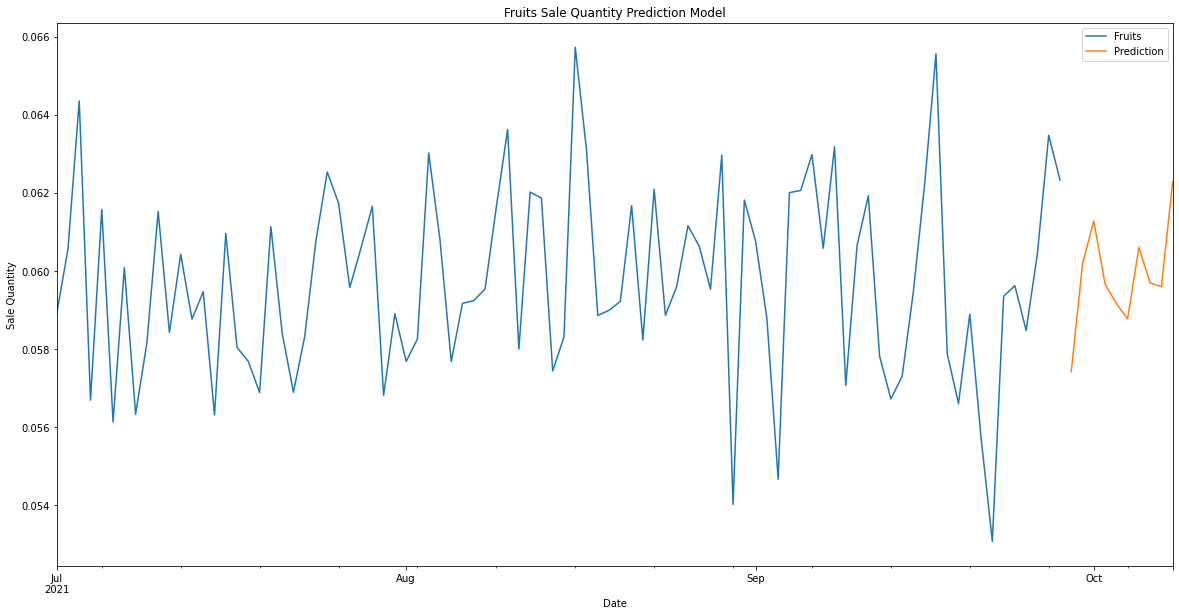

In [342]:
dfF.plot(legend=True, label='Past Fruits Sales Quantity',ylabel='Sale Quantity', xlabel='Date',title='Fruits Sale Quantity Prediction Model', figsize=(20,10))
pred_finF.plot(legend=True, label='Prediction')

<AxesSubplot:title={'center':'Seafood Sale Quantity Prediction Model'}, xlabel='Date', ylabel='Sale Quantity'>

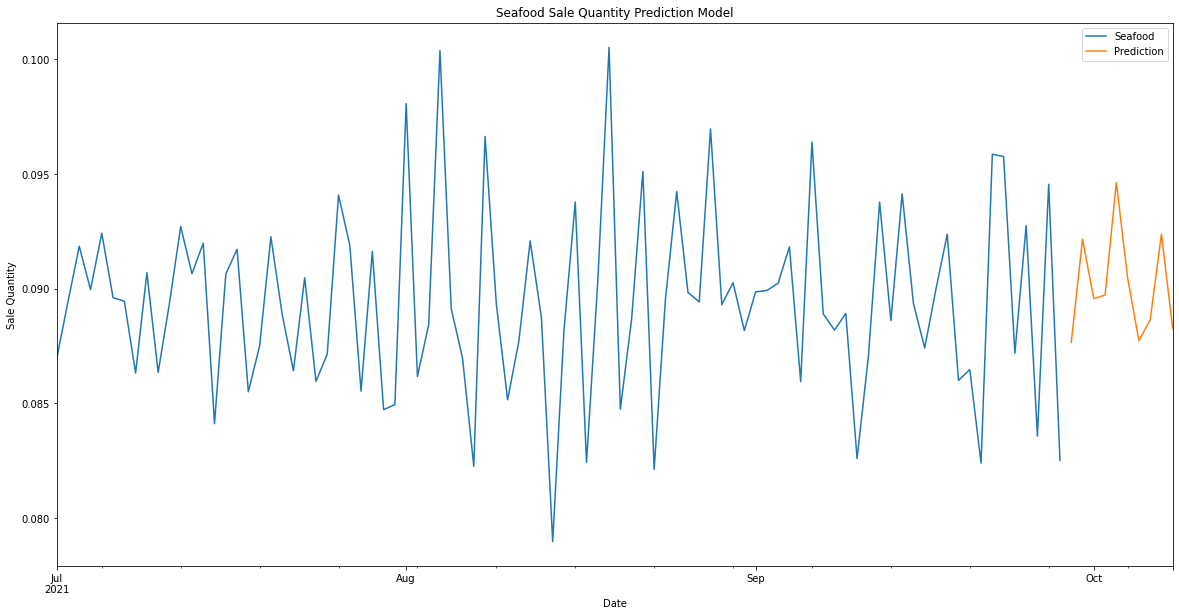

In [343]:
dfS.plot(legend=True, label='Past Seafood Sales Quantity', ylabel='Sale Quantity', xlabel='Date',title='Seafood Sale Quantity Prediction Model',figsize=(20,10))
pred_finS.plot(legend=True, label='Prediction')